In [27]:
!pip install torch
!pip install torchvision

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 16.7 MB/s eta 0:00:00a 0:00:01


In [35]:
import torch
import math
print(torch.__version__)

2.3.1


# Pytorch Tensors

- A tensor is a multi-dimensional matrix similar to NumPy's ndarrays: 

- A scalar can be represented as a zero-dimensional tensor.
- A vector can be represented as a one-dimensional tensor.
- A two-dimensional matrix can be represented as a two-dimensional tensor.
- A multi-dimensional matrix can be represented as a multi-dimensional tensor.

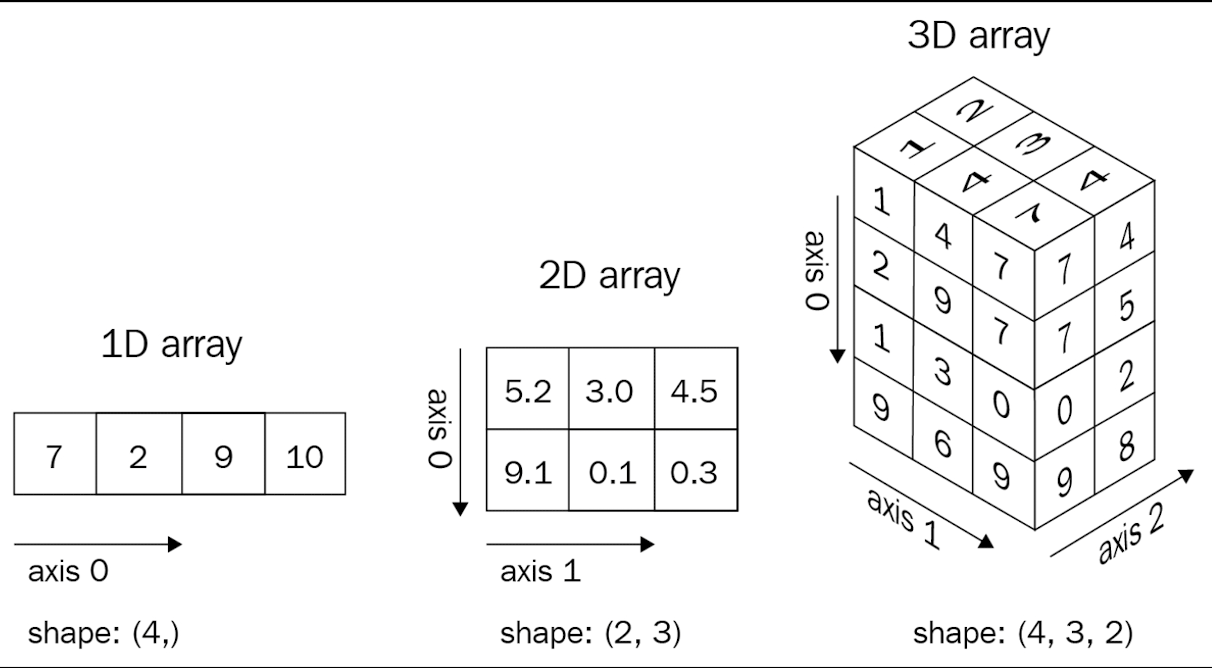

For instance, we can consider a color image as a three-dimensional tensor of pixel values, since a color image consists of height x width x 3 pixels – where the three channels correspond to the RGB channels. Similarly, a grayscale image can be considered a two-dimensional tensor as it consists of height x width pixels.

In [44]:
x = torch.tensor([1,2]) # This creates a 1-dimensional tensor (vector) with 2 elements.
print(x)
print(x.shape)

tensor([1, 2])
torch.Size([2])


In [45]:
x = torch.tensor([[1,2]]) # This creates a 2-dimensional tensor (matrix) with 1 row and 2 columns.
print(x)
print(x.shape)

tensor([[1, 2]])
torch.Size([1, 2])


In [47]:
x = torch.tensor([False, 1, 2.0]) # different data types in 1 tensor. 1-dim tensor(vector) with 3 elements
print(x)
print(x.shape)

tensor([0., 1., 2.])
torch.Size([3])


In [53]:
torch.zeros((3,4))

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])

In [54]:
torch.ones((3,5))

tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]])

In [59]:
torch.randint(low=1, high=10, size=(3,5)) # randint generate three rows and four columns of values between 0 and 10

tensor([[2, 4, 4, 4, 4],
        [3, 4, 3, 5, 7],
        [3, 9, 8, 7, 3]])

In [60]:
torch.randint(low=100, high=500, size=(10,5))

tensor([[214, 382, 284, 434, 263],
        [321, 172, 256, 293, 443],
        [141, 344, 278, 493, 391],
        [422, 439, 233, 155, 423],
        [450, 488, 404, 292, 220],
        [282, 260, 278, 273, 438],
        [299, 343, 437, 154, 304],
        [184, 224, 123, 275, 466],
        [323, 324, 227, 194, 482],
        [347, 442, 422, 184, 290]])

In [62]:
torch.rand(3,6) # values will be between 0 and 1

tensor([[0.4358, 0.9217, 0.4337, 0.7584, 0.3367, 0.7268],
        [0.4755, 0.8208, 0.0199, 0.1167, 0.5499, 0.4559],
        [0.5258, 0.0787, 0.5931, 0.4476, 0.8803, 0.1084]])

In [64]:
# Generate numbers that follow a normal distribution with three rows and five columns
torch.randn(3,5)

tensor([[ 0.0978,  0.0607, -1.3580, -0.2758,  0.1718],
        [ 0.0741,  0.3081,  0.3091,  1.1526, -0.4915],
        [ 0.5764,  1.0327,  0.9325,  1.0787,  0.0942]])

In [66]:
# Convert a NumPy array into a Torch tensor using torch.tensor(<numpy-array>):

x = np.array([[10,20,30],[2,3,4]])
y = torch.tensor(x)
print(type(x), type(y))

<class 'numpy.ndarray'> <class 'torch.Tensor'>


In [67]:
x = torch.tensor([[1,2,3,4], [5,6,7,8]]) 
print(x * 10)

tensor([[10, 20, 30, 40],
        [50, 60, 70, 80]])


In [8]:
x = torch.tensor([[1,2,3,4], [5,6,7,8]]) 
y = x.add(10) # Can also do x + 10

print(x)
print(y)

tensor([[1, 2, 3, 4],
        [5, 6, 7, 8]])
tensor([[11, 12, 13, 14],
        [15, 16, 17, 18]])


# Squeeze & Unsqueeze

In [9]:
x = torch.tensor([[1, 2, 3]])
print(x)
print("Original Shape:", x.shape)
x_squeezed = x.squeeze()
print(x_squeezed)
print("Squeezed Shape:", x_squeezed.shape)

tensor([[1, 2, 3]])
Original Shape: torch.Size([1, 3])
tensor([1, 2, 3])
Squeezed Shape: torch.Size([3])


In [13]:
test = torch.randint(low=100, high=500, size=(2,10,1))
print(test)
print(test.shape)

# squeeze() removes all singleton dimensions so it will convert [2,10,1] to [2,10]
test_squeeezed = test.squeeze() 
print("\nSqueeezed\n")
print(test_squeeezed)
print(test_squeeezed.shape)

tensor([[[318],
         [129],
         [107],
         [110],
         [241],
         [103],
         [155],
         [354],
         [134],
         [198]],

        [[179],
         [157],
         [255],
         [493],
         [241],
         [133],
         [318],
         [238],
         [247],
         [367]]])
torch.Size([2, 10, 1])

Squeeezed

tensor([[318, 129, 107, 110, 241, 103, 155, 354, 134, 198],
        [179, 157, 255, 493, 241, 133, 318, 238, 247, 367]])
torch.Size([2, 10])


In [93]:
test_squeeezed = test_squeeezed.unsqueeze(0) # Unsqueeze the tensor to add a singleton dimension at position 0
print(test_squeeezed)
print(test_squeeezed.shape)

tensor([[324, 265, 469, 490, 434, 319, 237, 323, 124, 471]])
torch.Size([1, 10])


In [94]:
# Broadcasting
a = torch.tensor([[1, 2, 3]])  # Shape: (1, 3)
b = torch.tensor([[4], [5], [6]])  # Shape: (3, 1)

result = a + b  # Shape: (3, 3)
print(result)

tensor([[5, 6, 7],
        [6, 7, 8],
        [7, 8, 9]])


In [95]:
# Reshaping
c = torch.tensor([7, 8, 9])  # Shape: (3,)
c_unsqueezed = torch.unsqueeze(c, 1)  # Shape: (3, 1)

print(c_unsqueezed)

tensor([[7],
        [8],
        [9]])


### Practical Use Case For Squeeze & Unsqueeze

Consider a scenario where you’re working with image data in a deep learning model. Often, image data needs to be reshaped to match the expected input dimensions of a neural network or manipulated for specific operations like batch processing.

#### Example: Image Preprocessing for Neural Network

Suppose you have a batch of grayscale images stored in a 3D tensor with dimensions [batch_size, height, width]. A convolutional neural network (CNN) typically expects input dimensions in the format [batch_size, channels, height, width]. For grayscale images, the number of channels is 1.

In [14]:
# Using unsqueeze to Add a Channel Dimension

# Here’s how you can use unsqueeze to add the channel dimension to the image tensor:


# Simulate a batch of 10 grayscale images with dimensions 28x28
batch_size = 10
height = 28
width = 28
images = torch.randn(batch_size, height, width)
print("Original images shape:", images.shape)

# Add a channel dimension to match the expected input of a CNN
images = images.unsqueeze(1)  # Add a channel dimension at index 1
print("Images shape after unsqueeze:", images.shape)

Original images shape: torch.Size([10, 28, 28])
Images shape after unsqueeze: torch.Size([10, 1, 28, 28])


In [15]:
# Using squeeze to Remove Unnecessary Dimensions

# After processing images through a network or some intermediate steps, you might end up with unnecessary singleton dimensions. 
# For instance, after aggregating data across channels,  you may want to remove the channel dimension for further processing 
# or visualization.

# Simulate processed image tensor with an extra dimension
processed_images = torch.randn(10, 1, 28, 28)
print("Processed images shape:", processed_images.shape)

# Remove the unnecessary channel dimension
processed_images = processed_images.squeeze(1)  # Remove the channel dimension at index 1
print("Processed images shape after squeeze:", processed_images.shape)

Processed images shape: torch.Size([10, 1, 28, 28])
Processed images shape after squeeze: torch.Size([10, 28, 28])


# Transpose

In [23]:
# Transposing

# Transposing a vector can be a bit tricky in the context of PyTorch because transposing is generally associated with 2D matrices. 
# However, you can effectively transpose a vector by changing its shape from a row vector to a column vector or vice versa.

print("\nTransposing a 1D Tensor aka Row Vector\n")
print("-------------------------------------------")
# Original 1D Tensor (Row Vector)

print("\nOriginal Tensor\n")
x = torch.tensor([1, 2, 3])
print("Original Tensor:", x)
print("Original Shape:", x.shape)

print("\nConvert 1D Tensor to Column Vector\n")
print("-------------------------------------------")
# Convert to Column Vector
x_column = torch.unsqueeze(x, 1)
print("Column Vector:", x_column)
print("Column Shape:", x_column.shape)


print("\nTransposing a 2D Tensor\n")
print("-------------------------------------------")
# Transposing a 2D Tensor

# Create a 2D tensor
x = torch.tensor([[1, 2, 3], [4, 5, 6]])

print("\nOriginal Tensor\n")
print("Original Tensor:", x)
print("Original Shape:", x.shape)

print("\nTransposing 2D Tensor\n")
print("-------------------------------------------")
x_transposed = x.transpose(0, 1)

print("Transposed Tensor:", x_transposed)
print("Transposed Shape:", x_transposed.shape)

# or using the T attribute:

x = torch.tensor([[1, 2, 3], [4, 5, 6]])
print("Transposed Tensor:", x.T)
print("Transposed Shape:", x.T.shape)


Transposing a 1D Tensor aka Row Vector

-------------------------------------------

Original Tensor

Original Tensor: tensor([1, 2, 3])
Original Shape: torch.Size([3])

Convert 1D Tensor to Column Vector

-------------------------------------------
Column Vector: tensor([[1],
        [2],
        [3]])
Column Shape: torch.Size([3, 1])

Transposing a 2D Tensor

-------------------------------------------

Original Tensor

Original Tensor: tensor([[1, 2, 3],
        [4, 5, 6]])
Original Shape: torch.Size([2, 3])

Transposing 2D Tensor

-------------------------------------------
Transposed Tensor: tensor([[1, 4],
        [2, 5],
        [3, 6]])
Transposed Shape: torch.Size([3, 2])
Transposed Tensor: tensor([[1, 4],
        [2, 5],
        [3, 6]])
Transposed Shape: torch.Size([3, 2])


### Practical Example of Using transpose()

The transpose function in PyTorch is used to swap two dimensions of a tensor. This is especially useful in scenarios like manipulating image data, where you might need to change the order of dimensions for various operations.

#### Example: Transposing Image Data

Consider a scenario where you have a batch of image data with dimensions [batch_size, height, width, channels] and you need to convert it to [batch_size, channels, height, width] for input to a convolutional neural network (CNN).

#### Function Signature of transpose
`torch.transpose(input, dim0, dim1) → Tensor`

	•	input (Tensor): The input tensor.
	•	dim0 (int): The first dimension to be swapped.
	•	dim1 (int): The second dimension to be swapped.

In [25]:
# Simulate a batch of 10 RGB images with dimensions [batch_size, height, width, channels]
batch_size = 10
height = 64
width = 64
channels = 3
images = torch.randn(batch_size, height, width, channels)
print("Original images shape:", images.shape)

# Transpose to convert from [batch_size, height, width, channels] to [batch_size, channels, height, width]
transposed_images = images.transpose(1, 3).transpose(2, 3)
print("Transposed images shape:", transposed_images.shape)

Original images shape: torch.Size([10, 64, 64, 3])
Transposed images shape: torch.Size([10, 3, 64, 64])


#### Data Augmentation: Manipulating Dimensions for Operations like Rotation, Flipping, etc.

In data augmentation, you often perform operations like rotations and flips on images. These operations may require transposing dimensions to match the expected input shape of various augmentation functions.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-3.6990206..4.4039507].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-3.4592907..3.8765316].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-3.6990206..4.4039507].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-3.4592907..3.8765316].


Original images shape: torch.Size([2, 64, 64, 3])
Images shape after permute: torch.Size([2, 3, 64, 64])
Augmented images shape: torch.Size([2, 64, 64, 3])


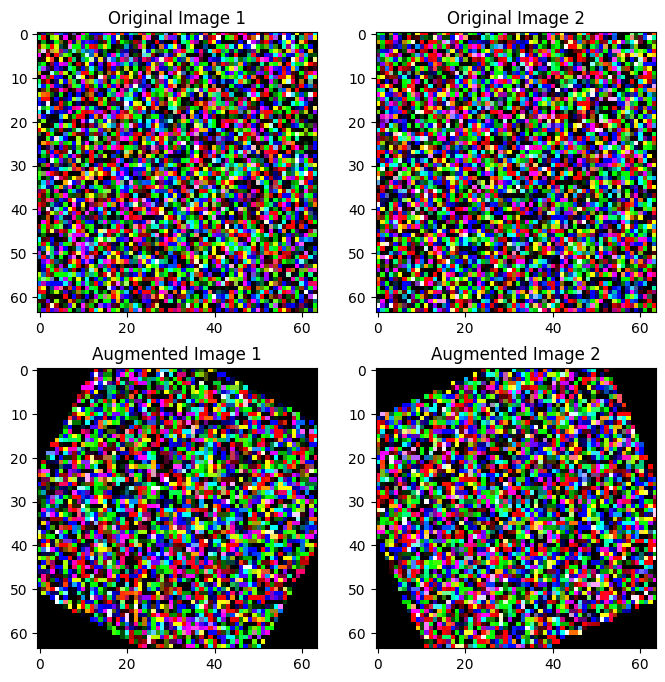

In [33]:
import torch
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Simulate a batch of 2 RGB images with dimensions [batch_size, height, width, channels]
batch_size = 2
height = 64
width = 64
channels = 3
images = torch.randn(batch_size, height, width, channels)
print("Original images shape:", images.shape)

# 1. Transpose to convert from [batch_size, height, width, channels] to [batch_size, channels, height, width]
# 2. We are using Permute instead of Transpose here. Permute allows to swap multiple dimensions at the same time transpose allows to 
# do one at a time
# 3. Impel of Permute:
# https://github.com/pytorch/pytorch/blob/a6170573c898a1367517d8daf8e777abaf96f752/aten/src/ATen/native/TensorShape.cpp#L367-L385
images = images.permute(0, 3, 1, 2) # Going from [batch_size, height, width, channels] to [batch_size, channels, height, width]

# This reordering is often required when preparing image data for input to convolutional neural networks (CNNs) that 
# expect the channel dimension to come before the spatial dimensions (height and width).

print("Images shape after permute:", images.shape)

# Define a transformation pipeline
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.RandomRotation(70)
])

# Apply transformations
augmented_images = torch.stack([transform(image) for image in images])

# Transpose back to [batch_size, height, width, channels] for visualization
augmented_images = augmented_images.permute(0, 2, 3, 1)
print("Augmented images shape:", augmented_images.shape)

# Plot original and augmented images
fig, ax = plt.subplots(2, 2, figsize=(8, 8))
ax[0, 0].imshow(images[0].permute(1, 2, 0).numpy())
ax[0, 0].set_title("Original Image 1")
ax[0, 1].imshow(images[1].permute(1, 2, 0).numpy())
ax[0, 1].set_title("Original Image 2")
ax[1, 0].imshow(augmented_images[0].numpy())
ax[1, 0].set_title("Augmented Image 1")
ax[1, 1].imshow(augmented_images[1].numpy())
ax[1, 1].set_title("Augmented Image 2")
plt.show()


# Not writing code but another usecase for permute is:
# When interpreting the output of a neural network, you often need to transpose the dimensions back to a more interpretable format. 
# For example, after getting the output from a CNN, you might want to convert it back to a standard image format for visualization.

### Using help(FUNCTION_NAME) and dir(torch.Tensor) function

In [58]:
help(torch.transpose)

Help on built-in function transpose in module torch:

transpose(...)
    transpose(input, dim0, dim1) -> Tensor
    
    Returns a tensor that is a transposed version of :attr:`input`.
    The given dimensions :attr:`dim0` and :attr:`dim1` are swapped.
    
    If :attr:`input` is a strided tensor then the resulting :attr:`out`
    tensor shares its underlying storage with the :attr:`input` tensor, so
    changing the content of one would change the content of the other.
    
    If :attr:`input` is a :ref:`sparse tensor <sparse-docs>` then the
    resulting :attr:`out` tensor *does not* share the underlying storage
    with the :attr:`input` tensor.
    
    If :attr:`input` is a :ref:`sparse tensor <sparse-docs>` with compressed
    layout (SparseCSR, SparseBSR, SparseCSC or SparseBSC) the arguments
    :attr:`dim0` and :attr:`dim1` must be both batch dimensions, or must
    both be sparse dimensions. The batch dimensions of a sparse tensor are the
    dimensions preceding the sparse

In [60]:
dir(torch.Tensor) # full list of methods on tensor

['H',
 'T',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_priority__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__complex__',
 '__contains__',
 '__cuda_array_interface__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__div__',
 '__dlpack__',
 '__dlpack_device__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__idiv__',
 '__ifloordiv__',
 '__ilshift__',
 '__imod__',
 '__imul__',
 '__index__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__irshift__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__long__',
 '__lshift__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdiv__',
 '__reduce__',
 '__reduce_ex__

# Matmul()

In [ ]:
# Define matrix A with shape (2, 3)
A = torch.tensor([[1, 2, 3],
                  [4, 5, 6]])

# Define matrix B with shape (3, 2)
B = torch.tensor([[7, 8],
                  [9, 10],
                  [11, 12]])

print("Matrix A:\n", A)
print("Matrix B:\n", B)

torch.matmul(A, B)

In [110]:
# Alternate to matmul is the @ operator
A @ B

tensor([[ 58,  64],
        [139, 154]])

In [111]:
# Another alternate is the torch.mm function is specifically for matrix multiplication of 2D tensors.

# Define matrix A with shape (2, 3)
A = torch.tensor([[1, 2, 3],
                  [4, 5, 6]])

# Define matrix B with shape (3, 2)
B = torch.tensor([[7, 8],
                  [9, 10],
                  [11, 12]])

# Perform matrix multiplication using torch.mm
torch.mm(A, B)

tensor([[ 58,  64],
        [139, 154]])

### Other alternatives to MatMul

- torch.bmm: For batch matrix multiplication.
- torch.einsum: For flexible tensor operations, including matrix multiplication.

## Practical Use of MatMul

Geometric Operations in Computer Graphics and Vision: Rotation and Scaling

Geometric transformations such as rotation and scaling are fundamental in computer graphics and computer vision. These transformations can be represented using matrix multiplication.

#### Example: 2D Rotation and Scaling

Let’s consider a 2D example where we want to rotate and scale a set of points. We’ll define a transformation matrix for each operation and apply them using matmul.

#### Rotation

To rotate a point (x, y) by an angle \theta counterclockwise around the origin, the transformation matrix R is:

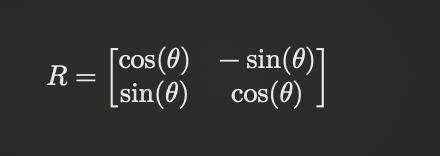

#### Scaling

To scale a point (x, y) by factors s_x and s_y along the x and y axes, the transformation matrix S is:

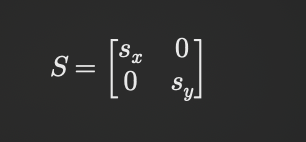

#### Combined Transformation

We can combine rotation and scaling into a single transformation matrix by multiplying the individual matrices.


In [36]:
# Define points to be transformed (shape: [num_points, 2])
points = torch.tensor([
    [1.0, 0.0],
    [0.0, 1.0],
    [-1.0, 0.0],
    [0.0, -1.0]
])
print("Original points:\n", points)

# Define rotation angle (in radians)
theta = math.pi / 4  # 45 degrees

# Define scaling factors
scale_x = 2.0
scale_y = 1.5

# Define rotation matrix
rotation_matrix = torch.tensor([
    [math.cos(theta), -math.sin(theta)],
    [math.sin(theta), math.cos(theta)]
])
print("Rotation matrix:\n", rotation_matrix)

# Define scaling matrix
scaling_matrix = torch.tensor([
    [scale_x, 0.0],
    [0.0, scale_y]
])
print("Scaling matrix:\n", scaling_matrix)

# Combine rotation and scaling
transformation_matrix = torch.matmul(rotation_matrix, scaling_matrix)
print("Combined transformation matrix:\n", transformation_matrix)

# Apply transformation
transformed_points = torch.matmul(points, transformation_matrix.T)
print("Transformed points:\n", transformed_points)

Original points:
 tensor([[ 1.,  0.],
        [ 0.,  1.],
        [-1.,  0.],
        [ 0., -1.]])
Rotation matrix:
 tensor([[ 0.7071, -0.7071],
        [ 0.7071,  0.7071]])
Scaling matrix:
 tensor([[2.0000, 0.0000],
        [0.0000, 1.5000]])
Combined transformation matrix:
 tensor([[ 1.4142, -1.0607],
        [ 1.4142,  1.0607]])
Transformed points:
 tensor([[ 1.4142,  1.4142],
        [-1.0607,  1.0607],
        [-1.4142, -1.4142],
        [ 1.0607, -1.0607]])


In [39]:
# Another simple example of using matmul

# Simulate a batch of matrices with dimensions [batch_size, input_features, output_features]
batch_size = 2
input_features = 4
output_features = 3

# Create random input and weight tensors
batch_input = torch.randn(batch_size, input_features, output_features)
batch_weights = torch.randn(batch_size, output_features, input_features)

# Perform batch matrix multiplication using matmul
batch_output = torch.matmul(batch_input, batch_weights)
print("Batch input shape:", batch_input.shape)
print("Batch weights shape:", batch_weights.shape)
print("Batch output shape:", batch_output.shape)

# This example demonstrates how matmul can be used for both single matrix multiplication and batch matrix multiplication, 
# making it a powerful tool in various practical scenarios.

Batch input shape: torch.Size([2, 4, 3])
Batch weights shape: torch.Size([2, 3, 4])
Batch output shape: torch.Size([2, 4, 4])


# Concatenate

- Dimension Size Compatibility: The tensors to be concatenated must have the same size for all dimensions except the dimension along which they are concatenated.

- For example, if you concatenate two tensors along dim=0, they must have the same size for all other dimensions.

In [40]:
#Concatenate

x = torch.randn(2,2,2)
print(x)
z = torch.cat([x,x], axis=1) # np.concatenate()
print(z)

tensor([[[ 1.2728,  0.1020],
         [-0.5828,  1.2529]],

        [[ 0.8921, -0.1267],
         [ 0.9076, -0.6052]]])
tensor([[[ 1.2728,  0.1020],
         [-0.5828,  1.2529],
         [ 1.2728,  0.1020],
         [-0.5828,  1.2529]],

        [[ 0.8921, -0.1267],
         [ 0.9076, -0.6052],
         [ 0.8921, -0.1267],
         [ 0.9076, -0.6052]]])


In [41]:
help(torch.cat)

Help on built-in function cat in module torch:

cat(...)
    cat(tensors, dim=0, *, out=None) -> Tensor
    
    Concatenates the given sequence of :attr:`seq` tensors in the given dimension.
    All tensors must either have the same shape (except in the concatenating
    dimension) or be a 1-D empty tensor with size ``(0,)``.
    
    :func:`torch.cat` can be seen as an inverse operation for :func:`torch.split`
    and :func:`torch.chunk`.
    
    :func:`torch.cat` can be best understood via examples.
    
    .. seealso::
    
        :func:`torch.stack` concatenates the given sequence along a new dimension.
    
    Args:
        tensors (sequence of Tensors): any python sequence of tensors of the same type.
            Non-empty tensors provided must have the same shape, except in the
            cat dimension.
        dim (int, optional): the dimension over which the tensors are concatenated
    
    Keyword args:
        out (Tensor, optional): the output tensor.
    
    Exampl

In [42]:
# Create two 1D tensors 
a = torch.tensor([1, 2, 3])
b = torch.tensor([4, 5, 6])

# Concatenate along the default dimension (dim=0)
c = torch.cat((a, b))

print("Concatenated Tensor:", c)
# Output: tensor([1, 2, 3, 4, 5, 6])

Concatenated Tensor: tensor([1, 2, 3, 4, 5, 6])


In [122]:
# Create two 2D tensors
a = torch.tensor([[1, 2, 3], [4, 5, 6]])
b = torch.tensor([[7, 8, 9], [10, 11, 12]])

# Concatenate along rows (dim=0)
c = torch.cat((a, b), dim=0)

print("Concatenated Tensor along dim=0:\n", c)

Concatenated Tensor along dim=0:
 tensor([[ 1,  2,  3],
        [ 4,  5,  6],
        [ 7,  8,  9],
        [10, 11, 12]])


In [123]:
# Create two 2D tensors
a = torch.tensor([[1, 2, 3], [4, 5, 6]])
b = torch.tensor([[7, 8, 9], [10, 11, 12]])

# Concatenate along columns (dim=1)
c = torch.cat((a, b), dim=1)

print("Concatenated Tensor along dim=1:\n", c)

Concatenated Tensor along dim=1:
 tensor([[ 1,  2,  3,  7,  8,  9],
        [ 4,  5,  6, 10, 11, 12]])


In [125]:
# Create two 3D tensors
a = torch.tensor([[[1, 2], [3, 4]], [[5, 6], [7, 8]]])
b = torch.tensor([[[9, 10], [11, 12]], [[13, 14], [15, 16]]])

# Concatenate along the first dimension (dim=0)
c = torch.cat((a, b), dim=0)

print("Concatenated Tensor along dim=0:\n", c)

d = torch.cat((a, b), dim=1)

print("Concatenated Tensor along dim=1:\n", d)

Concatenated Tensor along dim=0:
 tensor([[[ 1,  2],
         [ 3,  4]],

        [[ 5,  6],
         [ 7,  8]],

        [[ 9, 10],
         [11, 12]],

        [[13, 14],
         [15, 16]]])
Concatenated Tensor along dim=1:
 tensor([[[ 1,  2],
         [ 3,  4],
         [ 9, 10],
         [11, 12]],

        [[ 5,  6],
         [ 7,  8],
         [13, 14],
         [15, 16]]])


### Practical use of cat()

#### Concatenating Feature Maps

- In neural networks, you might want to concatenate feature maps from different layers or different channels. This is common in architectures like U-Net or in tasks like multi-scale feature extraction.

In [45]:
# Simulate feature maps from two different layers
feature_map1 = torch.randn(1, 64, 32, 32)  # Batch size 1, 64 channels, 32x32 spatial dimensions
feature_map2 = torch.randn(1, 128, 32, 32) # Batch size 1, 128 channels, 32x32 spatial dimensions

# Concatenate along the channel dimension
combined_feature_map = torch.cat((feature_map1, feature_map2), dim=1)
print("Combined feature map shape:", combined_feature_map.shape)

Combined feature map shape: torch.Size([1, 192, 32, 32])


#### Concatenating Sequences

- In sequence modeling (e.g., natural language processing), you might need to concatenate sequences of tokens or embeddings.

In [46]:
# Simulate two sequences of token embeddings
sequence1 = torch.randn(5, 10)  # Sequence of length 5, each token with 10-dimensional embedding
sequence2 = torch.randn(3, 10)  # Sequence of length 3, each token with 10-dimensional embedding

# Concatenate along the sequence length dimension
combined_sequence = torch.cat((sequence1, sequence2), dim=0)
print("Combined sequence shape:", combined_sequence.shape)

Combined sequence shape: torch.Size([8, 10])


#### Concatenating with Unequal Dimensions

When concatenating tensors, they must have the same size along the dimensions you are not concatenating. Here’s an example where tensors have unequal dimensions, which will raise an error.

In [56]:
### Example that would work, we are concat on dim 1 and dim 0 is 2 and 2

try:
    tensor1 = torch.randn(2, 3)
    tensor2 = torch.randn(2, 4)  
    combined_tensor = torch.cat((tensor1, tensor2), dim=1)
    print(combined_tensor) 
except RuntimeError as e:
    print("RuntimeError:", e)


tensor([[-0.4887,  0.3632, -0.4444, -0.6124, -0.0185,  0.1803, -1.1525],
        [-0.2361, -1.0899, -0.1998, -0.1319,  1.1226,  0.0865,  0.5463]])


In [57]:
### Example that will NOT work, we are concat on dim 1 and dim 0 is 2 and 5

try:
    tensor1 = torch.randn(2, 3)
    tensor2 = torch.randn(5, 4)  
    combined_tensor = torch.cat((tensor1, tensor2), dim=1)
    print(combined_tensor) 
except RuntimeError as e:
    print("RuntimeError:", e)


RuntimeError: Sizes of tensors must match except in dimension 1. Expected size 2 but got size 5 for tensor number 1 in the list.


### Max Val using max()

In [135]:
# Max Val
# Extraction of the maximum value in a tensor can be performed using the following code: 

x = torch.arange(25).reshape(5,5)
print(x)
print('Max:', x.shape, x.max()) 
 # Max:  torch.Size([5, 5]) tensor(24)

tensor([[ 0,  1,  2,  3,  4],
        [ 5,  6,  7,  8,  9],
        [10, 11, 12, 13, 14],
        [15, 16, 17, 18, 19],
        [20, 21, 22, 23, 24]])
Max: torch.Size([5, 5]) tensor(24)


In [137]:
# We can extract the maximum value along with the row index where the maximum value is present:
x.max(dim=0)

torch.return_types.max(
values=tensor([20, 21, 22, 23, 24]),
indices=tensor([4, 4, 4, 4, 4]))

In [138]:
# We can extract the maximum value along with the column index where the maximum value is present:
x.max(dim=1)

torch.return_types.max(
values=tensor([ 4,  9, 14, 19, 24]),
indices=tensor([4, 4, 4, 4, 4]))

# Permute 

In [141]:
# Permute the dimensions of a tensor object:

# The torch.permute function in PyTorch is used to rearrange the dimensions of a tensor according to a specified order. 
# This can be useful for aligning tensor dimensions for various operations, such as when the expected input shape for a layer differs 
# from the current tensor shape.

x = torch.randn(10,20,30)
z = x.permute(2,0,1) # np.permute()
print('Permute dimensions:', x.shape, z.shape)

Permute dimensions: torch.Size([10, 20, 30]) torch.Size([30, 10, 20])


In [142]:
help(torch.permute)

Help on built-in function permute in module torch:

permute(...)
    permute(input, dims) -> Tensor
    
    Returns a view of the original tensor :attr:`input` with its dimensions permuted.
    
    Args:
        input (Tensor): the input tensor.
        dims (tuple of int): The desired ordering of dimensions
    
    Example:
        >>> x = torch.randn(2, 3, 5)
        >>> x.size()
        torch.Size([2, 3, 5])
        >>> torch.permute(x, (2, 0, 1)).size()
        torch.Size([5, 2, 3])



In [144]:
x = torch.tensor([[1, 2, 3],
                  [4, 5, 6]])

print("Original Tensor:\n", x)
print("Original Shape:", x.shape)

# Permute the dimensions of the tensor
x_permuted = x.permute(1, 0)

print("Permuted Tensor:\n", x_permuted)
print("Permuted Shape:", x_permuted.shape)

Original Tensor:
 tensor([[1, 2, 3],
        [4, 5, 6]])
Original Shape: torch.Size([2, 3])
Permuted Tensor:
 tensor([[1, 4],
        [2, 5],
        [3, 6]])
Permuted Shape: torch.Size([3, 2])


In [145]:
# Create a 3D tensor with shape (2, 3, 4)
x = torch.tensor([[[ 1,  2,  3,  4],
                   [ 5,  6,  7,  8],
                   [ 9, 10, 11, 12]],
                  [[13, 14, 15, 16],
                   [17, 18, 19, 20],
                   [21, 22, 23, 24]]])

x_permuted = x.permute(2, 0, 1)

print("Permuted Tensor:\n", x_permuted)
print("Permuted Shape:", x_permuted.shape)

Permuted Tensor:
 tensor([[[ 1,  5,  9],
         [13, 17, 21]],

        [[ 2,  6, 10],
         [14, 18, 22]],

        [[ 3,  7, 11],
         [15, 19, 23]],

        [[ 4,  8, 12],
         [16, 20, 24]]])
Permuted Shape: torch.Size([4, 2, 3])


# Other Methods in PyTorch

Since it is difficult to cover all the available operations in this notebook, it is important to know that you can do almost all NumPy operations in PyTorch with almost the same syntax as NumPy. Standard mathematical operations, such as abs, add, argsort, ceil, floor, sin, cos, tan, cumsum, cumprod, diag, eig, exp, log, log2, log10, mean, median, mode, resize, round, sigmoid, softmax, square, sqrt, svd, and transpose, to name a few, can be directly called on any tensor with or without axes where applicable.


# Auto gradients of tensor objects

- As we saw in first notebook, differentiation and calculating gradients play a critical role in updating the weights of a neural network.
PyTorch's tensor objects come with built-in functionality to calculate gradients.

In [87]:
x = torch.tensor([[2,4,5],[6,1,3]]) # , requires_grad=True)
print(x)

tensor([[2, 4, 5],
        [6, 1, 3]])


In [88]:
x = torch.tensor([[2,4,5],[6,1,3]], requires_grad=True) # Only works on floats
print(x)

RuntimeError: Only Tensors of floating point and complex dtype can require gradients

In [99]:
x = torch.tensor([[2.,4.,5.],[6.,1.,3.]], requires_grad=True)
print(x)
# The requires_grad parameter specifies that the gradient is to be calculated for the tensor object.

tensor([[2., 4., 5.],
        [6., 1., 3.]], requires_grad=True)


- Now lets define the way to calculate the output, which in this specific case is the sum of the squares of all inputs:

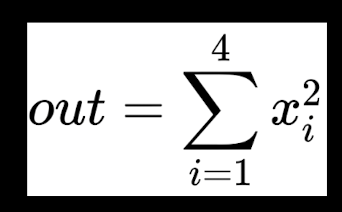

In [100]:
out = x.pow(2).sum()
print(out)

tensor(91., grad_fn=<SumBackward0>)


In [101]:
# The gradient of a value can be calculated by calling the backward() method to the value. 
# In our case, we calculate the gradient – change in out (output) for a small change in x (input) – as follows:

out.backward()

In [102]:
# We are now in a position to obtain the gradient of out with respect to x:
x.grad

# The gradient is a measure of how the output (out) changes when the input (x) is changed slightly. 
# Since we use pow(2) which is basically squaring every number, in mathematical terms, the gradient of the function  f(x) = x^2  is  2x .

# Notice that the gradients obtained here match with the intuitive gradient values (which are two times that of the value of x)

tensor([[ 4.,  8., 10.],
        [12.,  2.,  6.]])

In [104]:
# Another example with pow(3) where differential/gradient will become 3 x x^2
x = torch.tensor([[2.,4.,5.],[6.,1.,3.]], requires_grad=True)
out = x.pow(2).sum()
out.backward()
x.grad

tensor([[ 4.,  8., 10.],
        [12.,  2.,  6.]])

By now, we have learned about initializing, manipulating, and calculating gradients on top of a tensor object – which together constitute the fundamental building blocks of a neural network. Except for calculating auto gradients, initializing and manipulating data can also be performed using NumPy arrays. This calls for us to understand the reason why you should use tensor objects over NumPy arrays when building a neural network – which we will go through in the next section.

### Why use Tensor over Numpy

- Matrix multiplication (and other operations) performed on Torch objects on a GPU is ~18X faster than Torch objects on a CPU, and ~40X faster than the matrix multiplication performed on NumPy arrays. In general, matmul with Torch tensors on a CPU is still faster than NumPy. Note that you would notice this kind of speed up only if you have a GPU device. If you are working on a CPU device, you would not notice the dramatic increase in speed. This is why if you do not own a GPU, we recommend using Google Colab notebooks, as the service provides free GPUs.

#### Example:

In [108]:
import torch
x = torch.rand(1, 6400)
y = torch.rand(6400, 5000)

device = 'cuda' if torch.cuda.is_available() else 'cpu'

x, y = x.to(device), y.to(device) 

# I ran this on a local mahcine without gpu but if you run this on GPU machine, it will be 18x faster around 0.5ms
%timeit z=(x@y) 

7.42 ms ± 66.6 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [109]:
x, y = x.cpu(), y.cpu()
%timeit z=(x@y)

7.49 ms ± 239 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [110]:
import numpy as np
x = np.random.random((1, 6400))
y = np.random.random((6400, 5000))
%timeit z = np.matmul(x,y)

9.93 ms ± 619 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


### Using %timeit

- The %timeit magic command in Jupyter notebooks measures the execution time of a single line of code. For multi-line code blocks, you can use %%timeit.


### Other Useful Timing and Profiling Commands

- %time
- Measure the execution time once
`%time torch.matmul(a, b)`

- %%time
- The %%time magic command measures the execution time of a multi-line code block once.
`%%time
a = torch.randn(1000, 1000)
b = torch.randn(1000, 1000)
c = torch.matmul(a, b)
d = c.sum()`

- torch.autograd.profiler.profile
- For more detailed profiling, especially useful in PyTorch to analyze GPU performance:

`a = torch.randn(1000, 1000, device='cuda')`
`b = torch.randn(1000, 1000, device='cuda')`

`with torch.autograd.profiler.profile(use_cuda=True) as prof:
    c = torch.matmul(a, b)
print(prof.key_averages().table(sort_by="cuda_time_total"))`


# Other Useful Magic Commands

- `%env`: Gets, sets, or lists environment variables.
- `%load filename`: Loads code from a file into a cell.
- `%save filename n1-n2`: Saves the specified lines or cells to a file.
- `%%writefile script.py`
- `%debug:` Enters the interactive debugger after an exception is raised.

`def faulty_function():
    a = 1 / 0`

`try:
    faulty_function()
except ZeroDivisionError:
    %debug`

- `%pdb`: Automatically starts the debugger on errors.
- `%ls`: Lists the contents of the current directory.
- `%pwd`: Displays the current working directory.
- `%cd`: Changes the current working directory.
- `%run script.py`: Runs a Python script and imports its variables into the current namespace.

### Display and Plotting
- `%matplotlib inline`: Configures the backend of matplotlib to display plots inline in the notebook.
- `%%html`: Renders HTML content in the notebook.
- `%%javascript`: Executes JavaScript code in the notebook.


### Profiling / Memory
- `%prun`: Runs a command with the profiler. Also profiles a multiline code block For example `%prun test_function()`
- `%memit`: Measures the memory usage of a single line of code.
- `%%memit`: Measures the memory usage of a multi-line code block.